In [24]:
import glob
import re

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
from world_machine_experiments.shared.save_metrics import load_multiple_metrics

In [8]:
train_history = load_multiple_metrics("toy1d_experiment0_protocol_test", "toy1d_train_history")

In [9]:
train_history

{'Base': {'means': {'optimizer_loss_train': array([0.04425012, 0.02836951, 0.02317538, 0.02059911, 0.01899578,
          0.01799454, 0.01729227, 0.01673237, 0.01634869, 0.0159656 ,
          0.01574133, 0.0154802 , 0.01521562, 0.01501069, 0.01482937,
          0.01468036, 0.01450527, 0.01438409, 0.01424122, 0.01412446,
          0.01400081, 0.0138873 , 0.01378386, 0.01367382, 0.0135926 ,
          0.01347933, 0.01340924, 0.01330847, 0.0132532 , 0.01319211,
          0.01310417, 0.01302933, 0.01298214, 0.01295779, 0.01286499,
          0.01283356, 0.01280848, 0.01275864, 0.01268832, 0.01264723,
          0.01259113, 0.01254182, 0.01250577, 0.01246084, 0.01244566,
          0.0123935 , 0.01236702, 0.01233576, 0.01229894, 0.01226024,
          0.01221684, 0.012184  , 0.01215062, 0.01213756, 0.01207534,
          0.01205795, 0.01203581, 0.01200573, 0.01197967, 0.01192622,
          0.01190503, 0.01186098, 0.01184624, 0.01184645, 0.01180282,
          0.01178271, 0.01174796, 0.01172092, 0.0

In [30]:
variations = ["Base", "SensorialMask", "CompleteProtocol"]
n_epoch = len(train_history[variations[0]]["means"]["optimizer_loss_train"])

color_map = {
    "Base":"#60BF60",
    "SensorialMasker":"#D36767",
    "CompleteProtocol":"#6060BF"
}

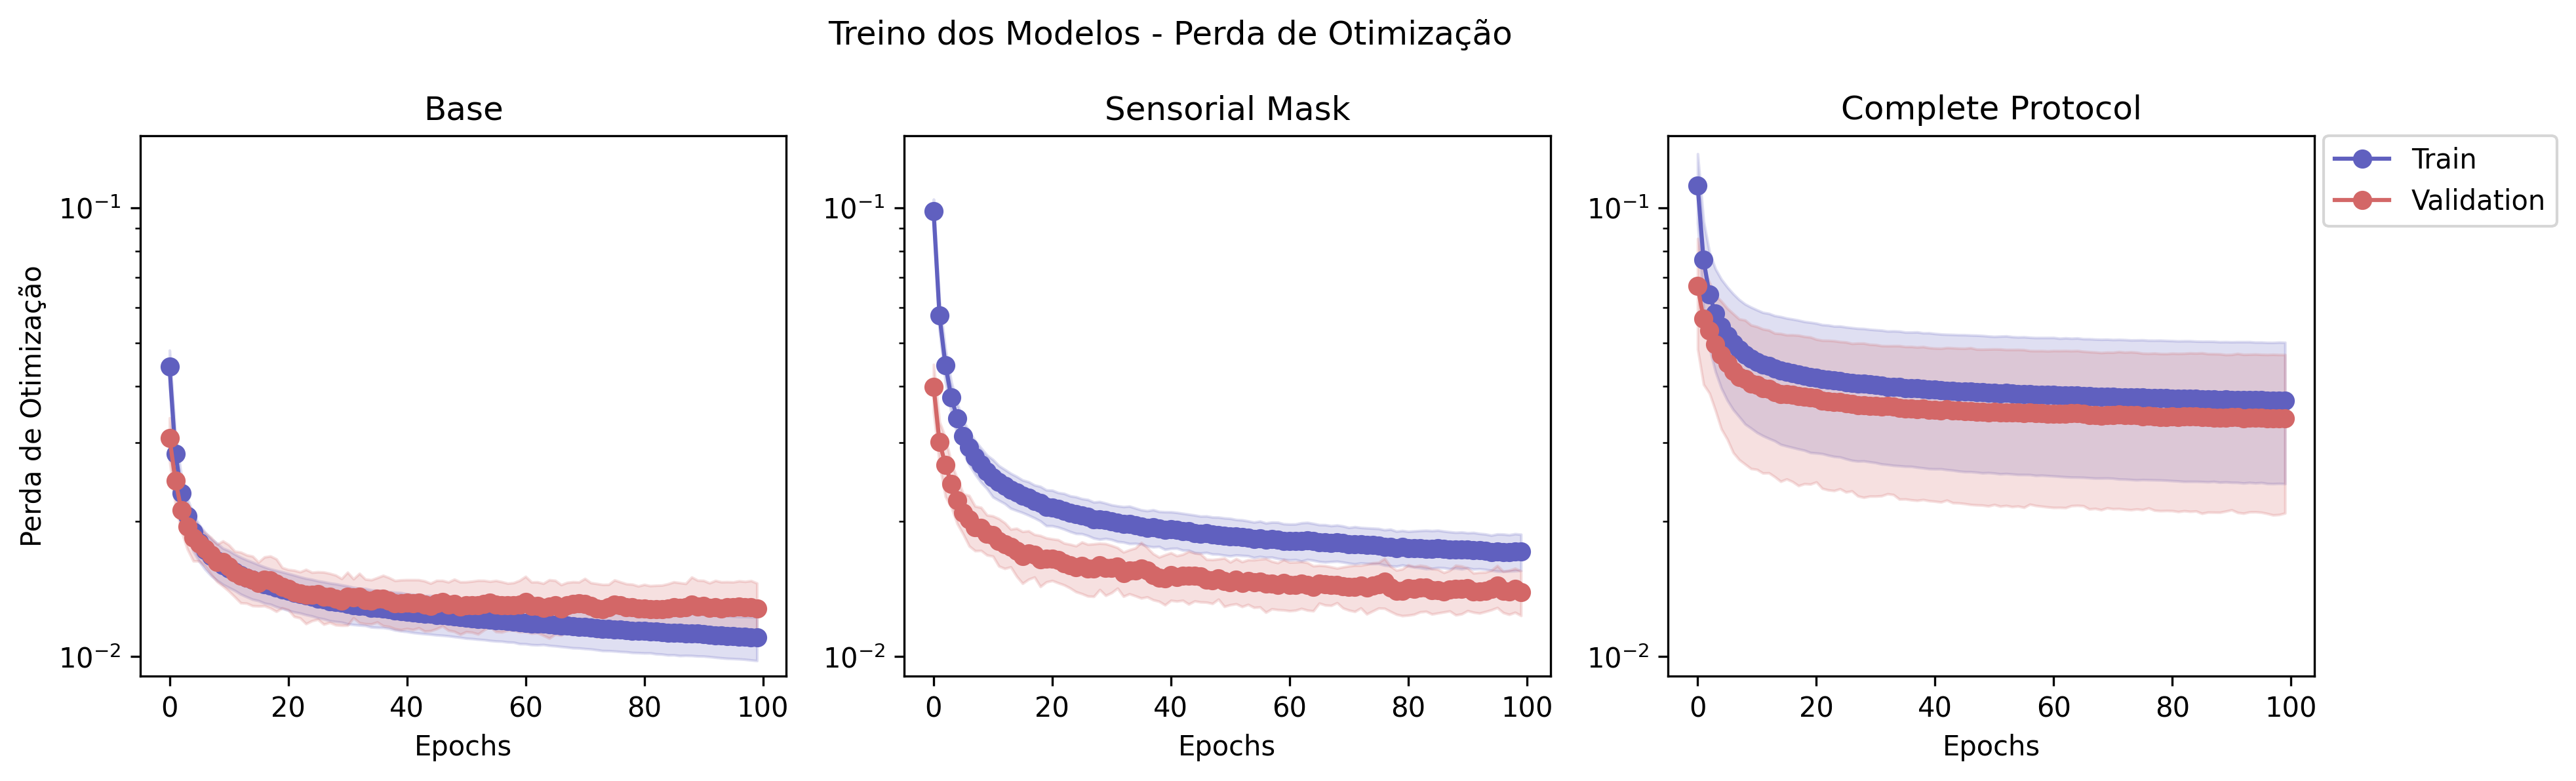

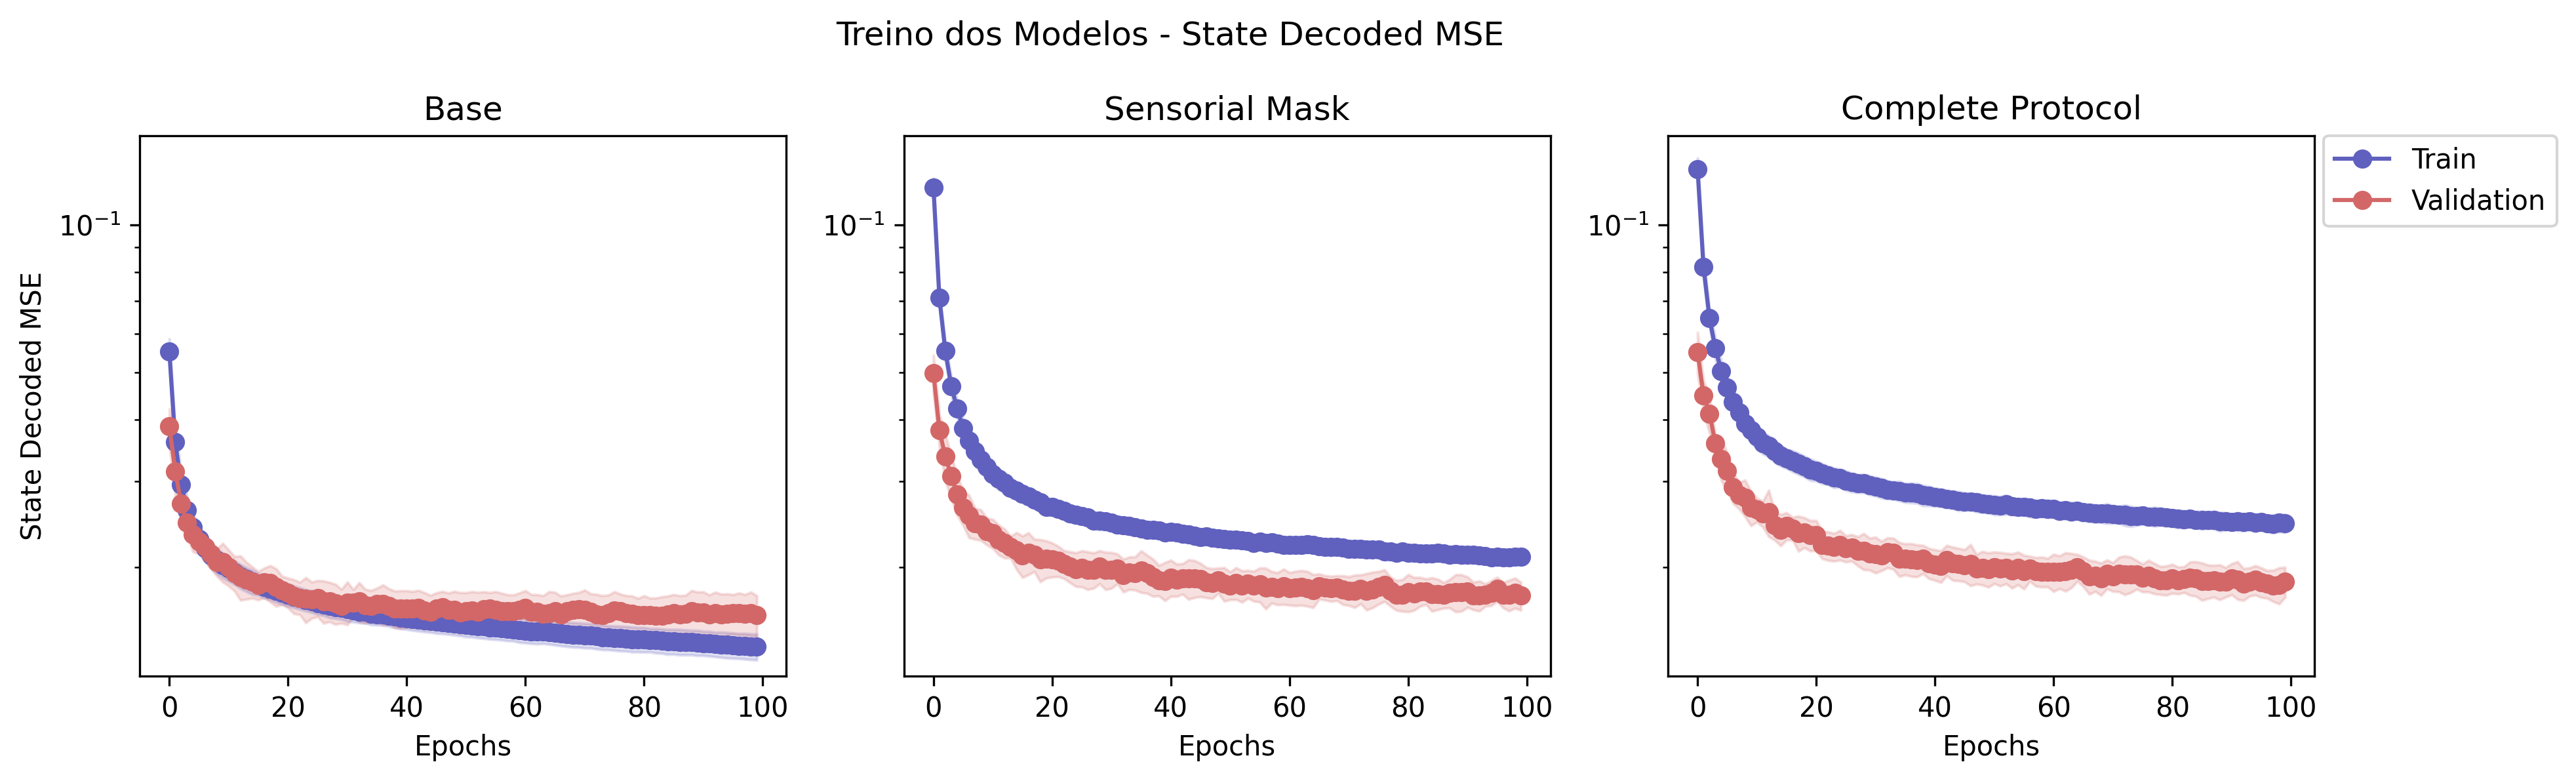

In [55]:
epochs = range(n_epoch)

figures = {}

from matplotlib.axes import Axes
from matplotlib.figure import Figure

metrics = ["optimizer_loss", "state_decoded_mse"]
ylabels = ["Perda de Otimização", "State Decoded MSE"]

for i in range(2):
    metric_name = metrics[i]
    ylabel = ylabels[i]
    plot_name = metric_name+"_train_history"

    fig, axs = plt.subplots(1, 3, dpi=300, figsize=(12,4))
    axs:list[Axes]

    for i, name in enumerate(variations):

        means = train_history[name]["means"][f"{metric_name}_train"]
        stds = train_history[name]["stds"][f"{metric_name}_train"]
        
        axs[i].plot(epochs, means, "o-", label="Train", color=color_map["CompleteProtocol"])
        axs[i].fill_between(epochs, means-stds, means+stds, color=color_map["CompleteProtocol"], alpha=.2)

        means = train_history[name]["means"][f"{metric_name}_val"]
        stds = train_history[name]["stds"][f"{metric_name}_val"]
        
        axs[i].plot(epochs, means, "o-", label="Validation", color=color_map["SensorialMasker"])
        axs[i].fill_between(epochs, means-stds, means+stds, color=color_map["SensorialMasker"], alpha=.2)

        #axs[i].errorbar(epochs, train_history[name]["means"]["optimizer_loss_train"], train_history[name]["stds"]["optimizer_loss_train"],  fmt="o-", label="Train", color=color_map["CompleteProtocol"])
        #axs[i].errorbar(epochs, train_history[name]["means"]["optimizer_loss_val"], train_history[name]["stds"]["optimizer_loss_val"],  fmt="o-", label="Validation", color=color_map["SensorialMasker"])

        axs[i].set_xlabel("Epochs")

        if i == 0:
            axs[i].set_ylabel(ylabel)

        axs[i].set_yscale("log")

        

        name = " ".join(re.sub( r"([A-Z])|(\d+)", r" \1\2", name).split())
        axs[i].set_title(name)


    maximum = -np.inf
    minimum = np.inf

    for ax in axs:
        maximum = max(maximum, ax.get_ylim()[1])
        minimum = min(minimum, ax.get_ylim()[0])

    for ax in axs:
        ax.set_ylim(minimum, maximum)

    plt.suptitle(f"Treino dos Modelos - {ylabel}")
    plt.tight_layout()
    plt.legend(bbox_to_anchor=(1.375, 1), borderaxespad=0)

    figures[plot_name] = fig

    plt.show()